---
# <small>SUPERVISED LEARNING</small><br><font color="LIMEGREEN">DECISION TREE & RANDOM FOREST
---
<font color="LIGHTSLATEGRAY">Prepared by **NICHOLAS DOMINIC**
<br>Powered by Interactive Python **Jupyter Notebook** (.ipynb), developed with **Python 3.7**

In [1]:
# Libraries for data loading and preprocessing
from sklearn.datasets import load_iris
from pandas import DataFrame as df
from pandas import read_csv
from numpy import c_ # for concatenation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for Decision Tree and Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Libraries for accuracy metrics and plotting tree
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# IRIS Dataset Loading<br><small>(for Classification problem)</small>

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
df(data=c_[x, y], columns=iris.feature_names+["Target"])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.25)
print("x_train {} y_train {}".format(x_train.shape, y_train.shape))
print("x_test {} y_test {}".format(x_test.shape, y_test.shape))

x_train (112, 4) y_train (112,)
x_test (38, 4) y_test (38,)


# PETROL CONSUMPTION Dataset<br><small>(for Regression problem)</small>

In [7]:
petrol = read_csv("data/petrol_consumption.csv")
print("Dataset dimension/shape: {}".format(petrol.shape))
petrol.head()

Dataset dimension/shape: (48, 5)


Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [8]:
petrol.columns[:4] # petrol feature names

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

In [9]:
petrol.columns[4] # petrol target name

'Petrol_Consumption'

In [10]:
xp = petrol.iloc[:, 0:4].values # Petrol_tax, Average_income, Paved_Highways, Population_Driver_lincence are set as input/feature data
yp = petrol.iloc[:, 4].values # Petrol_Consumption is set as target data

In [11]:
xp_train, xp_test, yp_train, yp_test = train_test_split(xp, yp, random_state=42, test_size=.2)
print("xp_train {} yp_train {}".format(xp_train.shape, yp_train.shape))
print("xp_test {} yp_test {}".format(xp_test.shape, yp_test.shape))

xp_train (38, 4) yp_train (38,)
xp_test (10, 4) yp_test (10,)


In [12]:
xp_train = StandardScaler().fit_transform(xp_train)
xp_test = StandardScaler().fit_transform(xp_test)

# <font color="CORAL">DECISION TREE (Iterative Dichotomizer 3 / ID3)

* **Classification**
<br> Documentation of [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [13]:
id3_classif_model = DecisionTreeClassifier(criterion="entropy") # impurity measurement as Entropy -> Information Gain -> ID3
id3_classif_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = id3_classif_model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [15]:
print("Classification Report: \n{}".format(metrics.classification_report(y_test, y_pred)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred)), end="\n\n")
print("Accuracy Score on train data: {}%".format(round(metrics.accuracy_score(y_true=y_train, y_pred=id3_classif_model.predict(x_train)) * 100, 2)))
print("Accuracy Score on test data: {:.5}%".format(metrics.accuracy_score(y_true=y_test, y_pred=y_pred) * 100))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix: 
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]

Accuracy Score on train data: 100.0%
Accuracy Score on test data: 97.368%


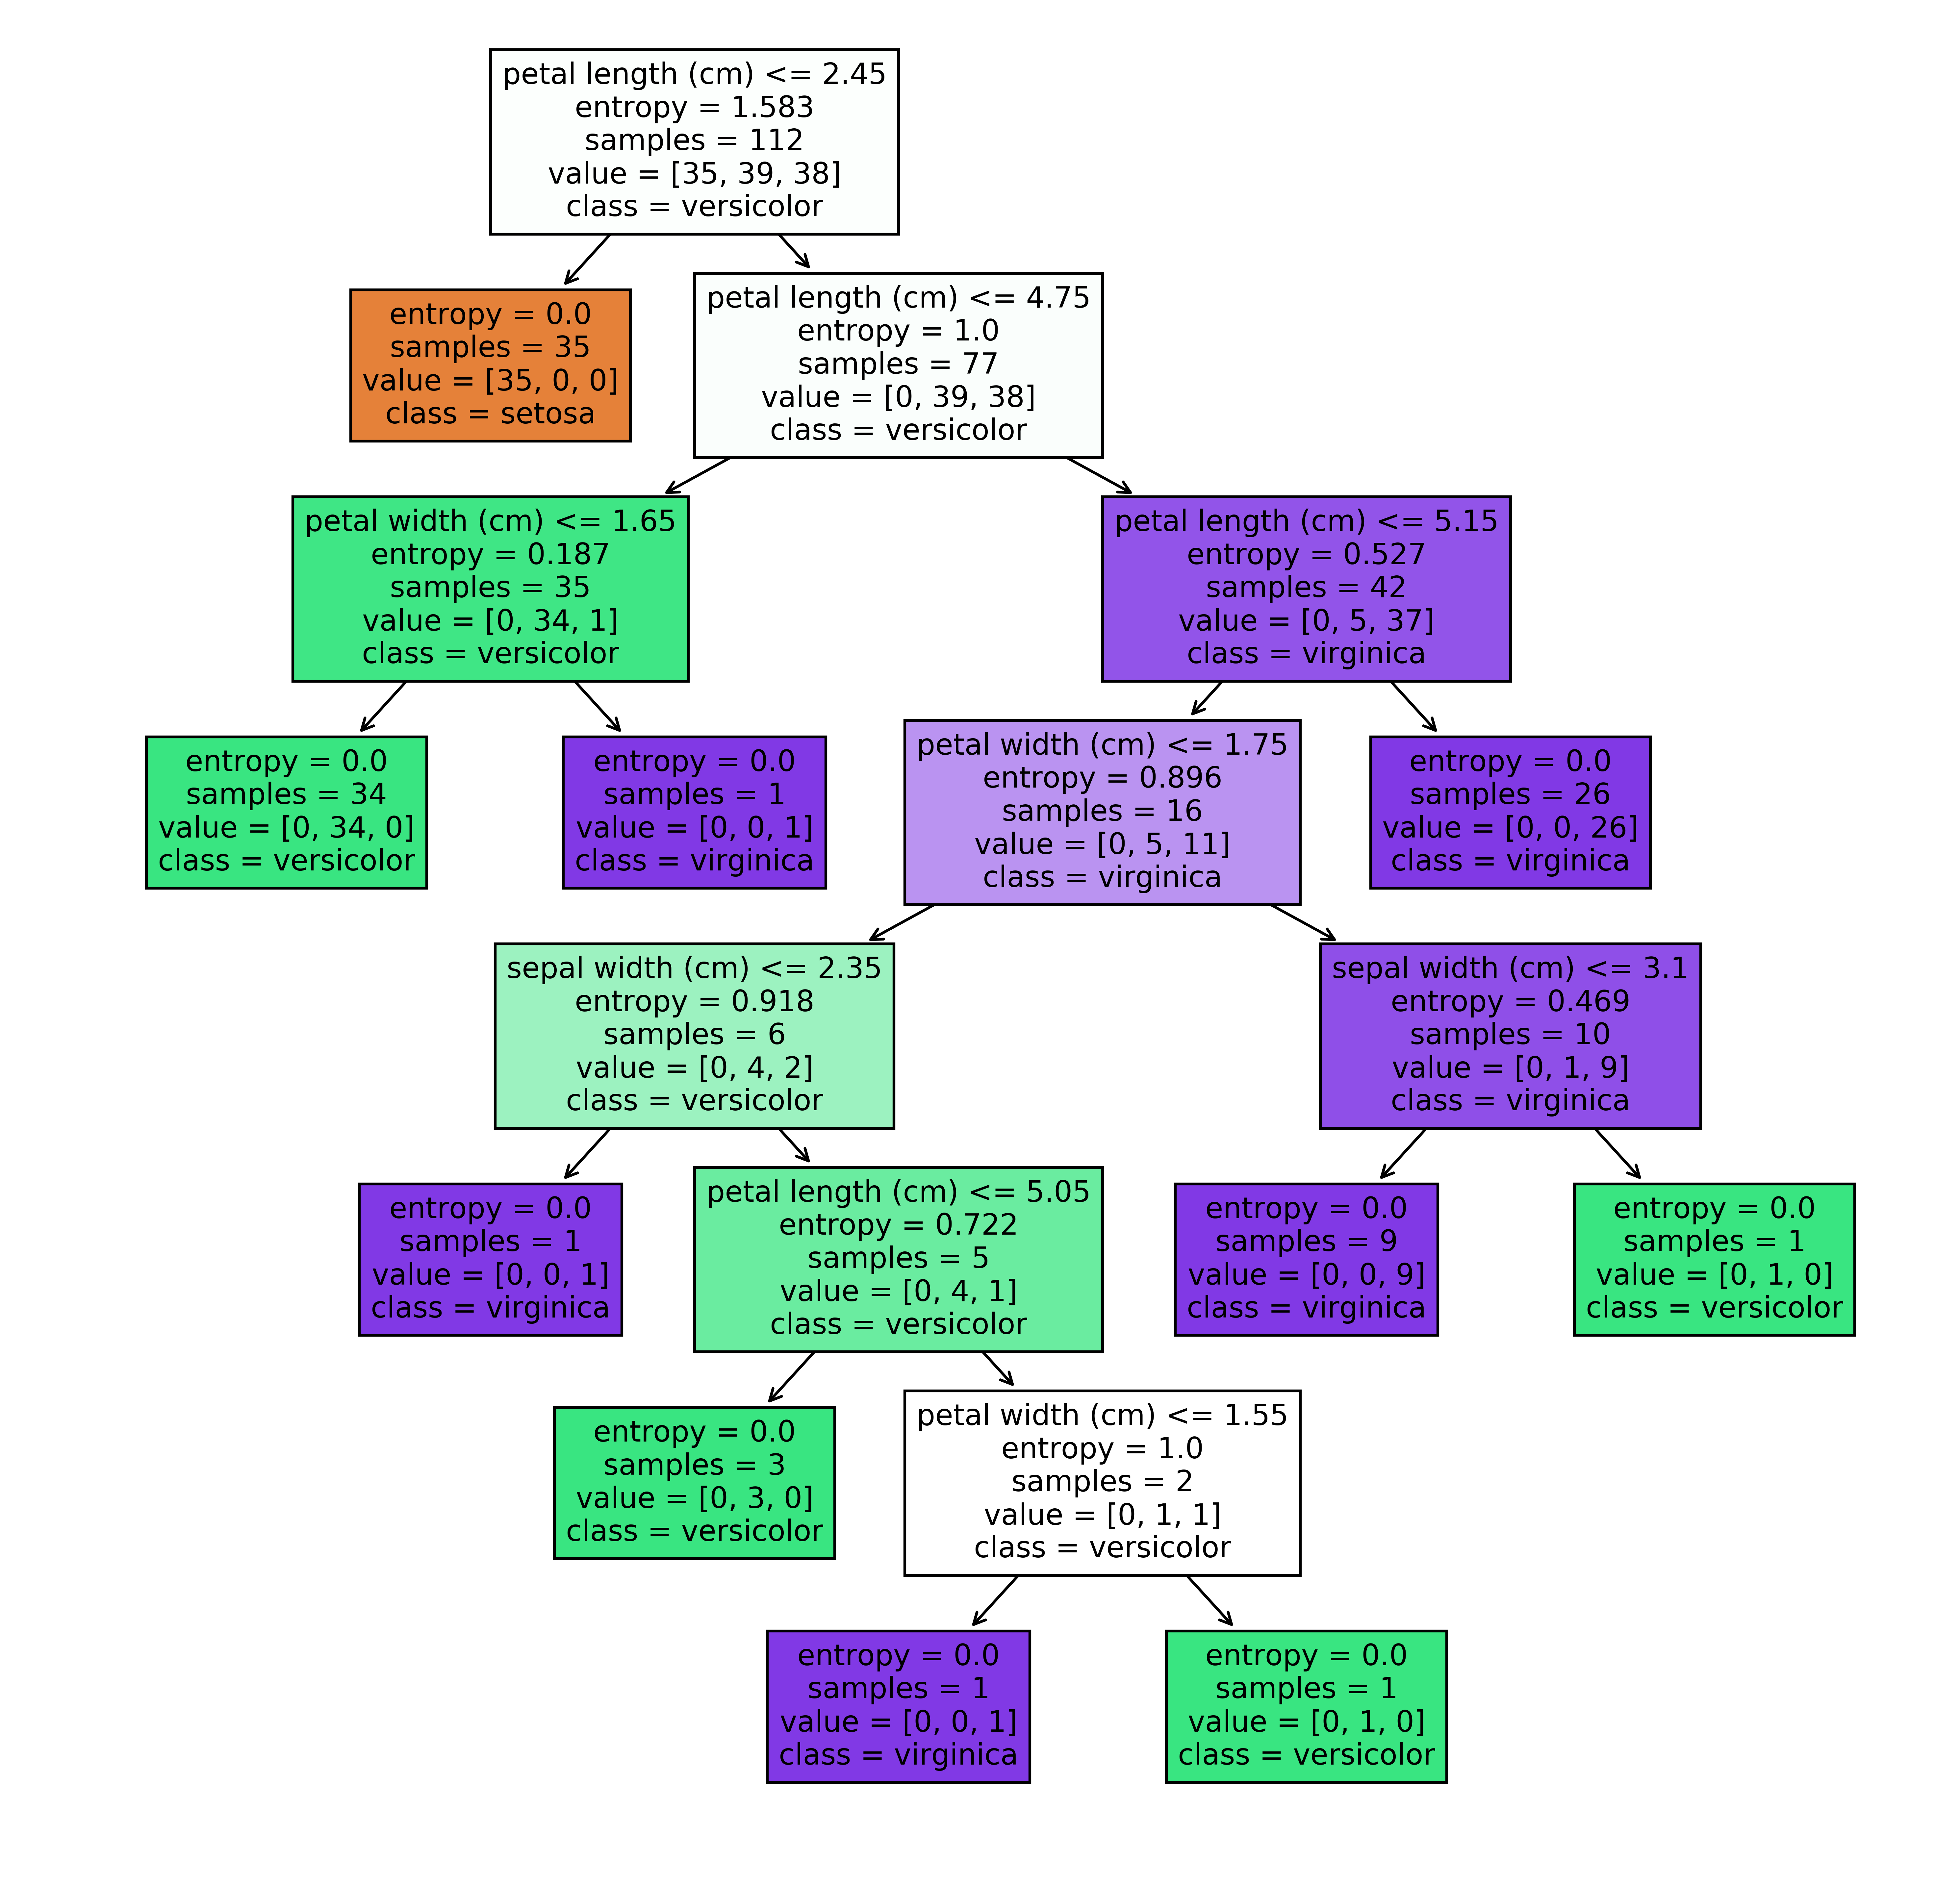

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), dpi=600)
plot_tree(id3_classif_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()
# fig.savefig("img/id3_classif.png") # to save the graph in your desktop directory

* **Regression**
<br> Documentation of [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [17]:
id3_reg_model = DecisionTreeRegressor(random_state=0)
id3_reg_model.fit(xp_train, yp_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [18]:
yp_predict = id3_reg_model.predict(xp_test)
yp_predict

array([635., 610., 580., 714., 464., 603., 471., 865., 510., 541.])

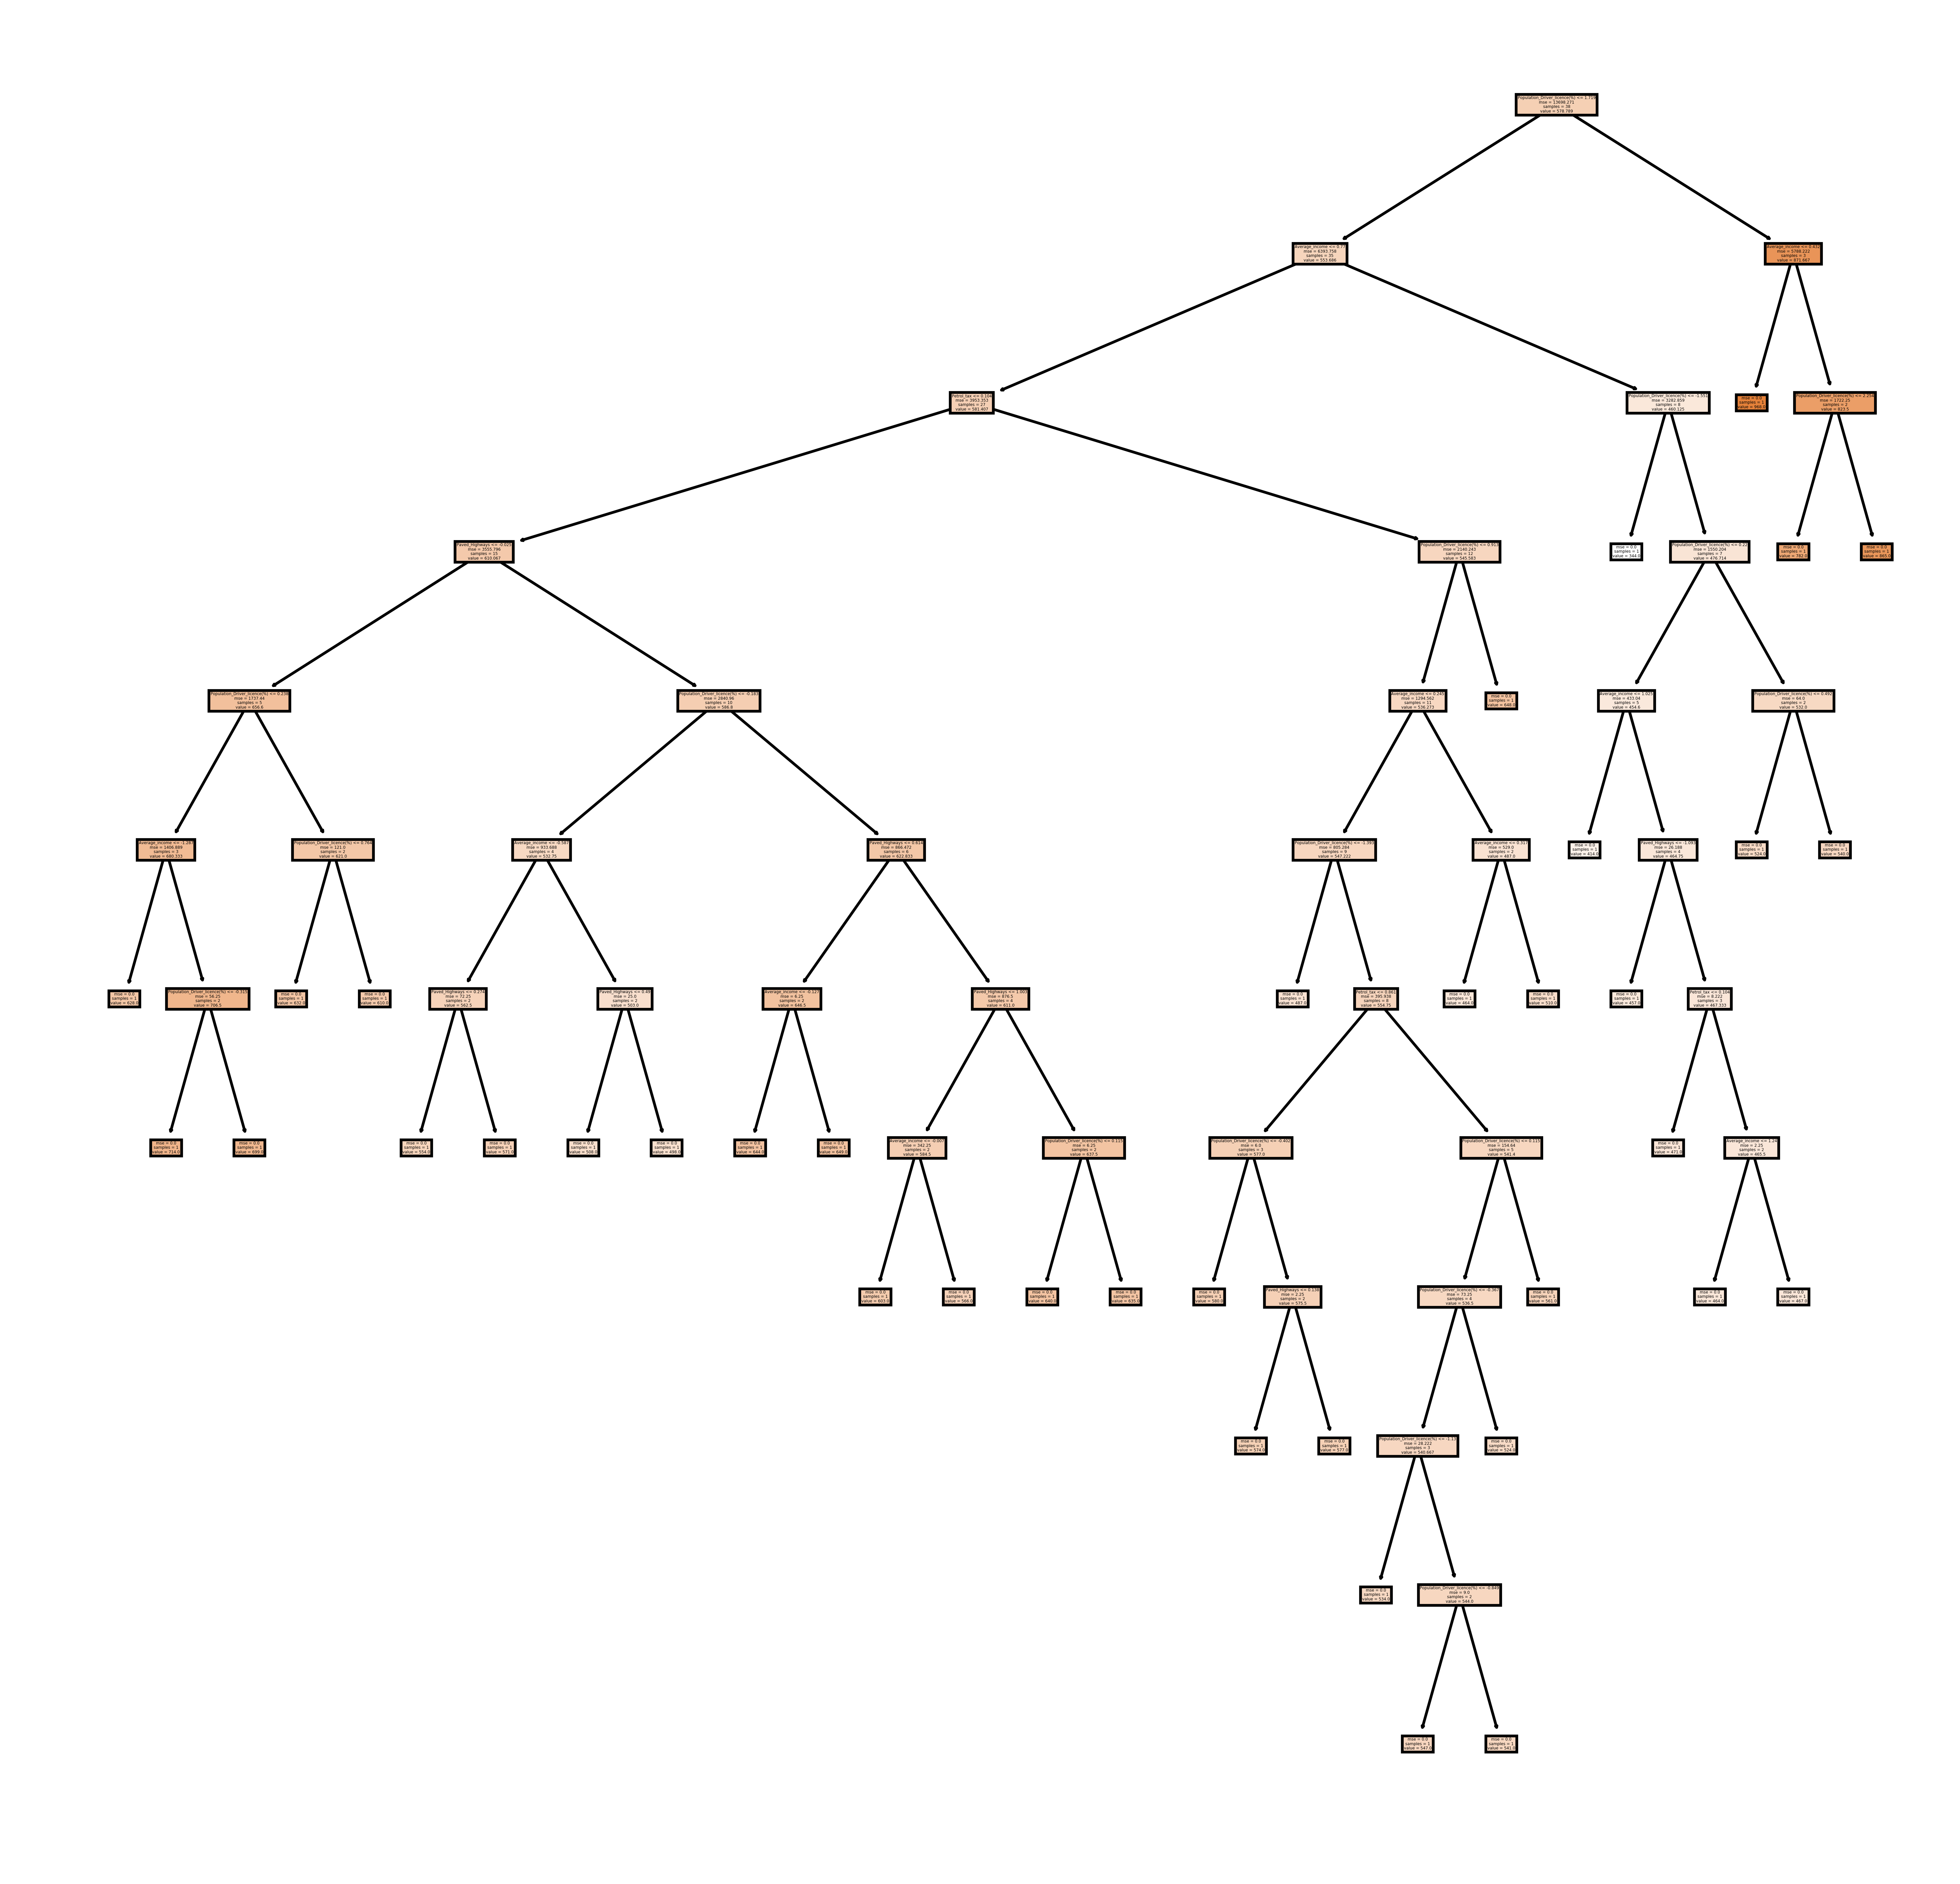

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), dpi=600)
plot_tree(id3_reg_model, feature_names=petrol.columns[:4], class_names=petrol.columns[4], filled=True)
plt.show()
# fig.savefig("img/id3_reg.png") # to save the graph in your desktop directory

# <font color="CORAL">RANDOM FOREST

* **Classification**
<br> Documentation of [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [20]:
random_forest_classif = RandomForestClassifier(n_estimators=10)
random_forest_classif.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_predict = random_forest_classif.predict(x_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [22]:
random_forest_classif.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
random_forest_classif.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1689389177, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1826599569, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

In [24]:
print("Classification Report: \n{}".format(metrics.classification_report(y_test, y_predict)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, y_predict)), end="\n\n")
print("Accuracy Score on train data: {}%".format(round(metrics.accuracy_score(y_true=y_train, y_pred=random_forest_classif.predict(x_train)) * 100, 2)))
print("Accuracy Score on test data: {:.5}%".format(metrics.accuracy_score(y_true=y_test, y_pred=y_predict) * 100))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Accuracy Score on train data: 100.0%
Accuracy Score on test data: 100.0%


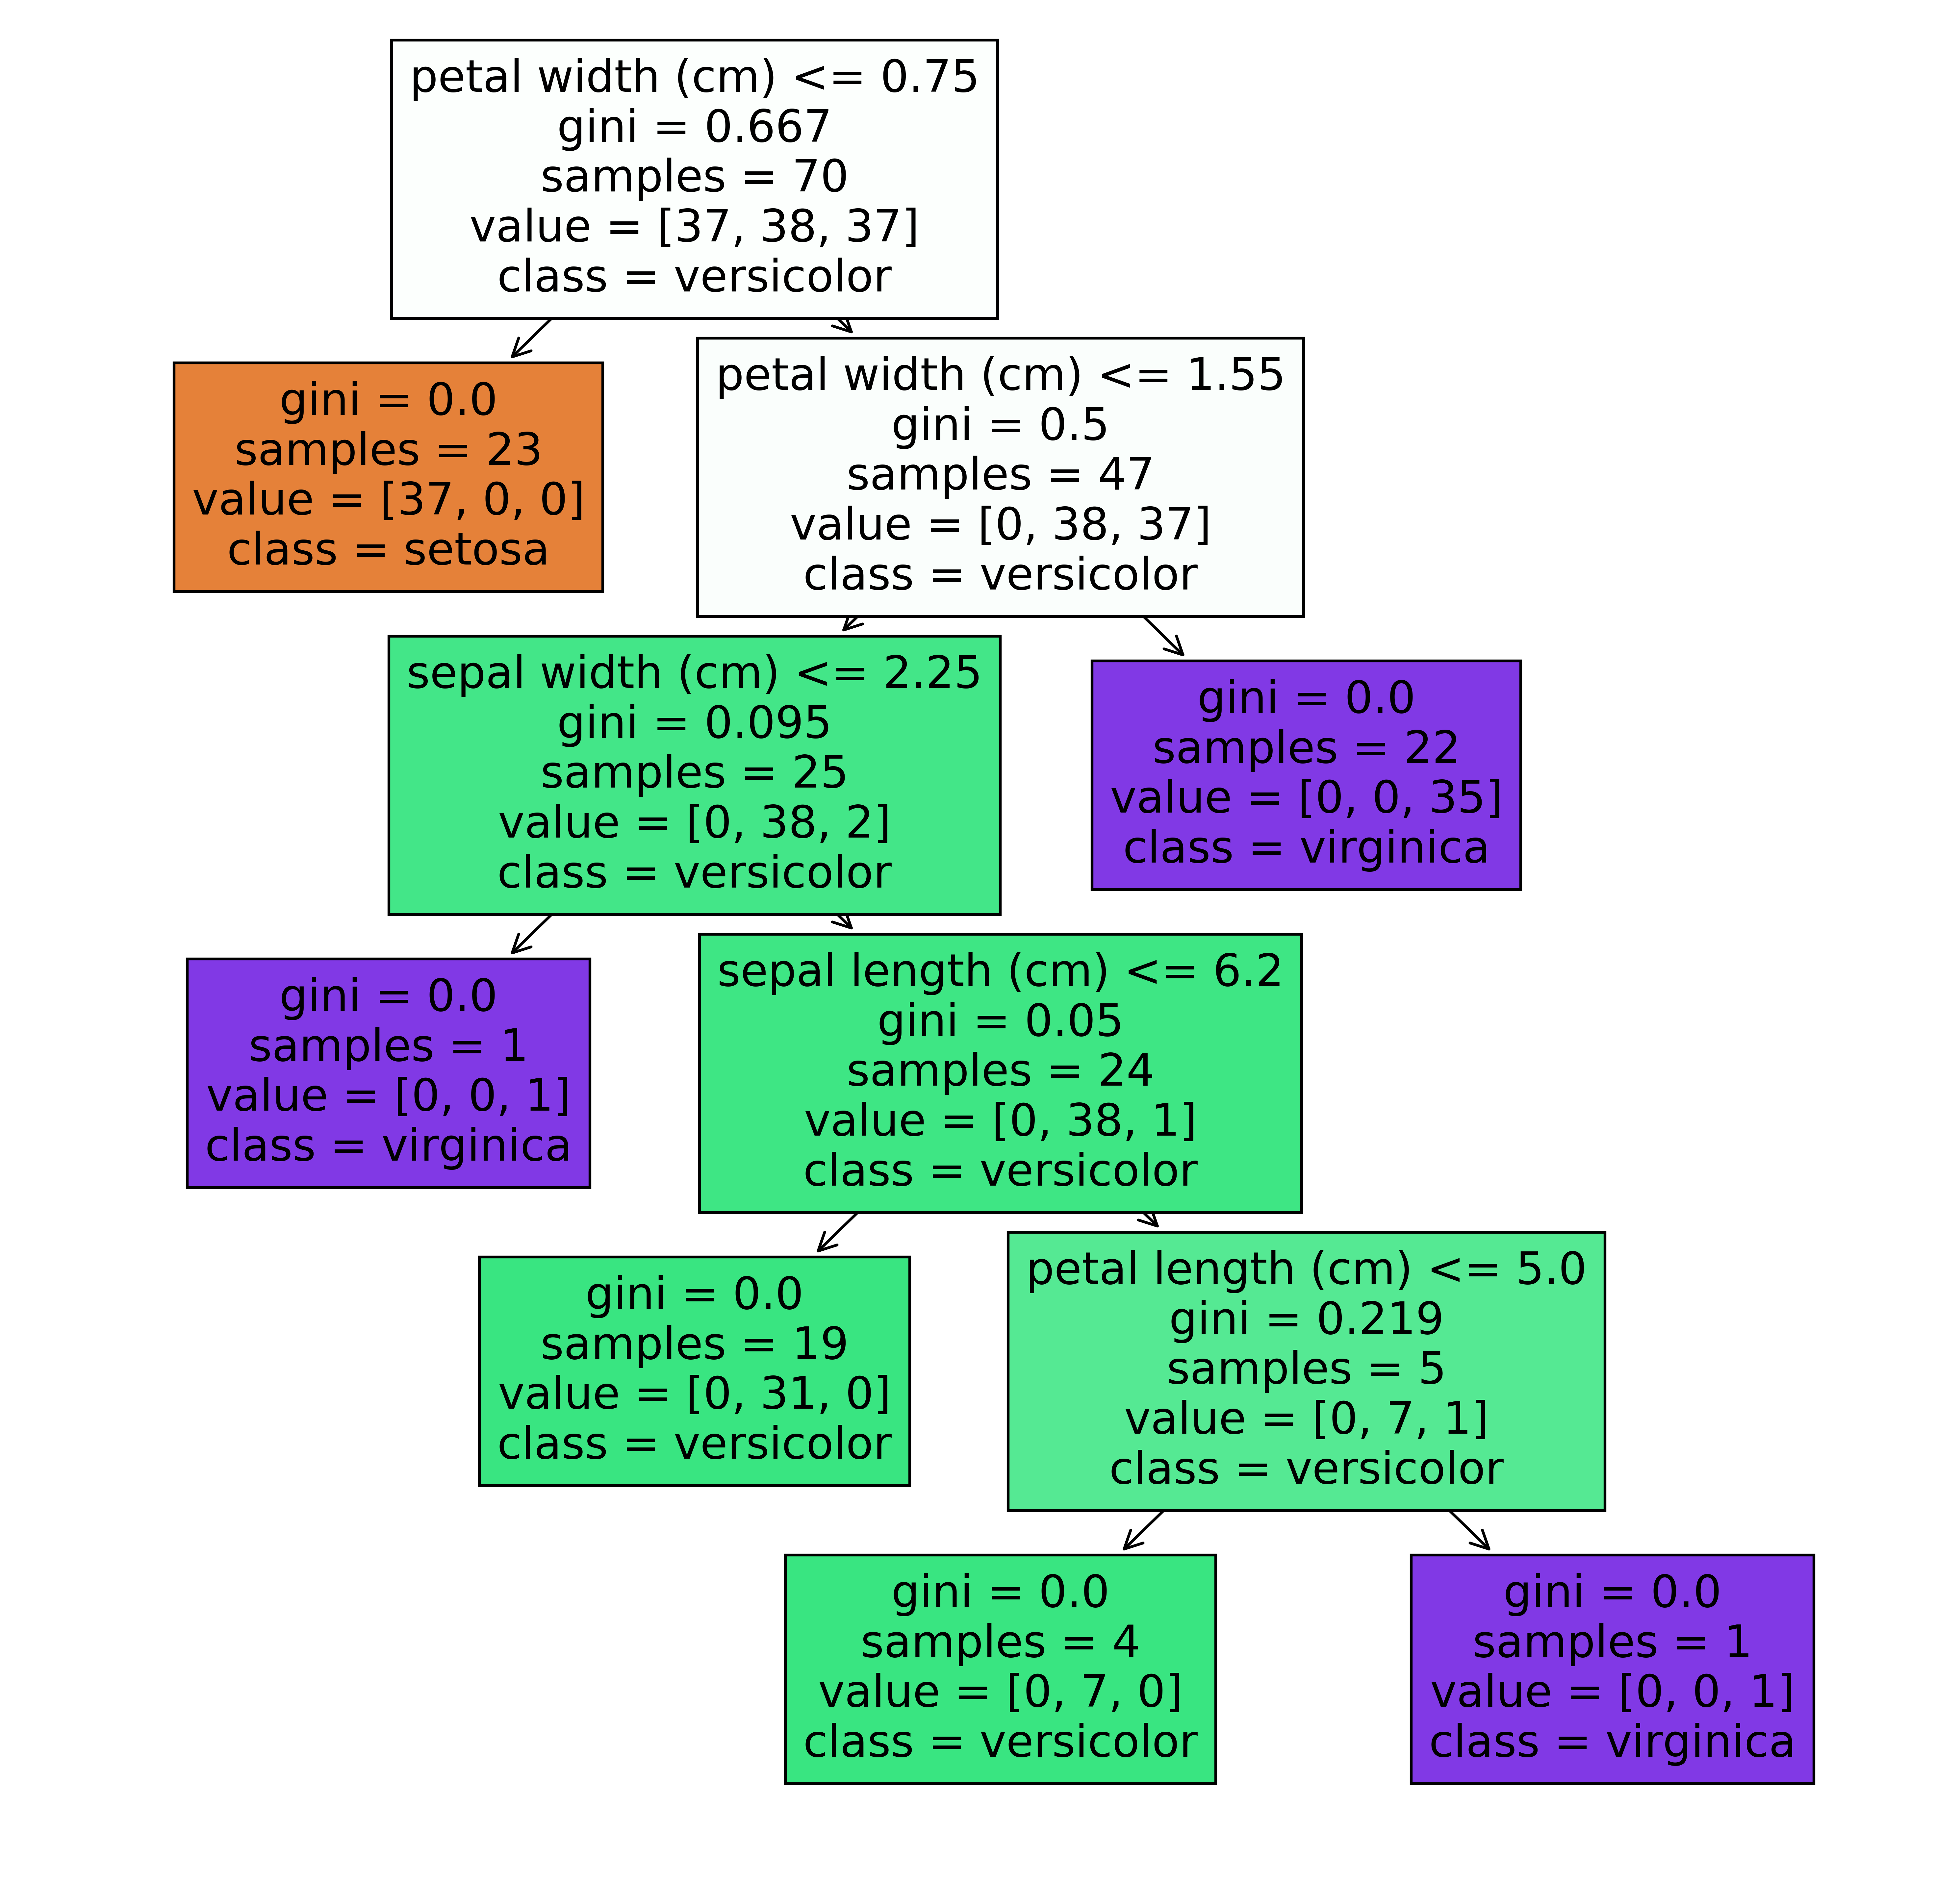

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), dpi=600)
plot_tree(random_forest_classif.estimators_[5], # draw the sixth decision tree
          feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()
# fig.savefig("img/rf_tree_classif.png") # to save the graph in your desktop directory

* **Regression**
<br> Documentation of [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [26]:
random_forest_reg = RandomForestRegressor(n_estimators=20)
random_forest_reg.fit(xp_train, yp_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
yp_pred = random_forest_reg.predict(xp_test)
yp_pred

array([602.3 , 576.4 , 604.35, 604.4 , 458.5 , 625.1 , 487.95, 849.6 ,
       494.4 , 568.45])

In [28]:
dict({"Mean Absolute Error" : metrics.mean_absolute_error(yp_test, yp_pred),
     "Mean Squared Error" : round(metrics.mean_squared_error(yp_test, yp_pred), 3) })

{'Mean Absolute Error': 49.39500000000001, 'Mean Squared Error': 6052.532}

In [29]:
random_forest_reg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
random_forest_reg.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1592898442, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1639624874, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impur

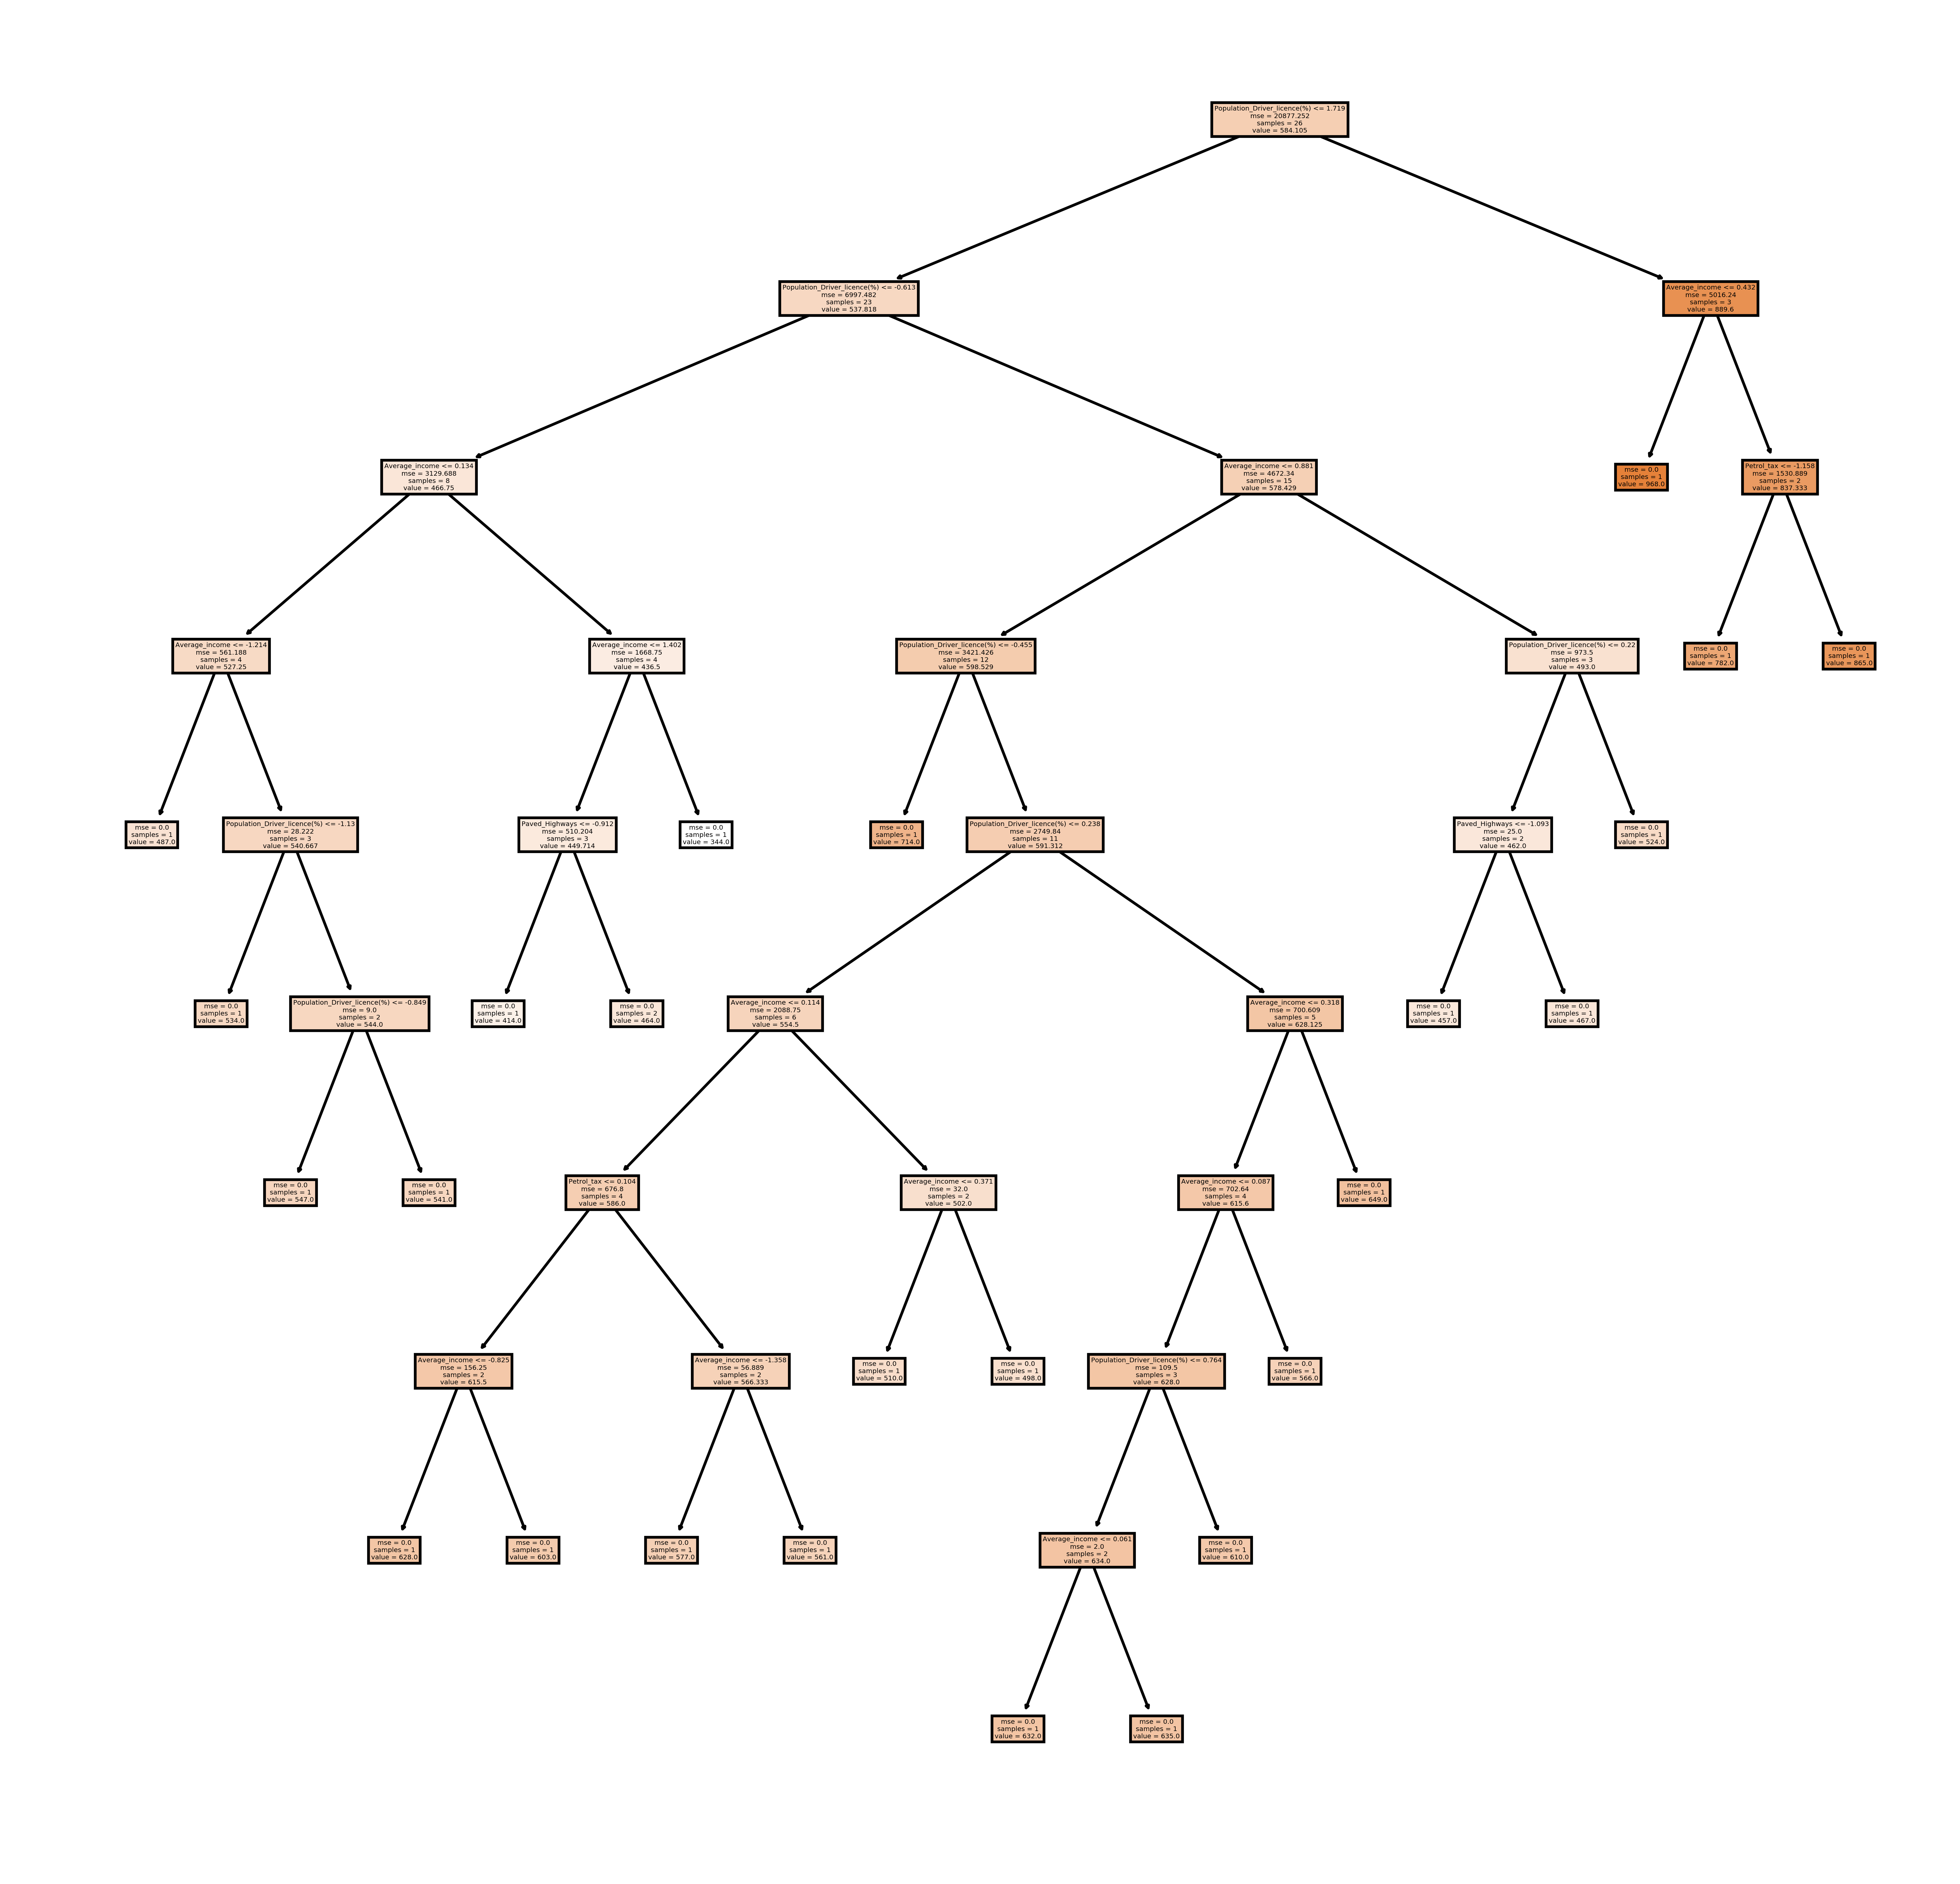

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), dpi=600)
plot_tree(random_forest_reg.estimators_[5], # draw the sixth decision tree
          feature_names=petrol.columns[:4], class_names=petrol.columns[4], filled=True)
plt.show()
# fig.savefig("img/rf_tree_reg.png") # to save the graph in your desktop directory